In [ ]:
!pip install pyspark findspark gdown

In [ ]:
import pandas as pd

from datetime import datetime, date
import pandas as pd
from pyspark.sql import Row
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [ ]:
import gdown

url = "https://drive.google.com/uc?id=1OZ5Gj_oXYc8dhLAdqcDZjJi84Ywr5pbI"
output = "covid_data.csv.zip"
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1OZ5Gj_oXYc8dhLAdqcDZjJi84Ywr5pbI
To: /content/covid_data.csv.zip
100%|██████████| 10.6M/10.6M [00:00<00:00, 166MB/s]


'covid_data.csv.zip'

In [ ]:
!mv 1OZ5Gj_oXYc8dhLAdqcDZjJi84Ywr5pbI coviz.zip

mv: cannot stat '1OZ5Gj_oXYc8dhLAdqcDZjJi84Ywr5pbI': No such file or directory


In [ ]:
!unzip coviz.zip

unzip:  cannot find or open coviz.zip, coviz.zip.zip or coviz.zip.ZIP.


Obtendo dados de resultados para diabetes

In [ ]:
!wget https://raw.githubusercontent.com/ai2-education-fiep-turma-2/24-ML-HPC/refs/heads/main/src/pima-indians-diabetes.csv

--2025-10-06 01:39:59--  https://raw.githubusercontent.com/ai2-education-fiep-turma-2/24-ML-HPC/refs/heads/main/src/pima-indians-diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23374 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.csv.2’

pima-indians-diabet 100%[===================>]  22.83K  --.-KB/s    in 0.001s  

2025-10-06 01:39:59 (30.2 MB/s) - ‘pima-indians-diabetes.csv.2’ saved [23374/23374]



### Carregando csv

In [ ]:
db = pd.read_csv('pima-indians-diabetes.csv')

### Obtendo Colunas

In [ ]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

In [ ]:
db.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### Análise Estatística básica

In [ ]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


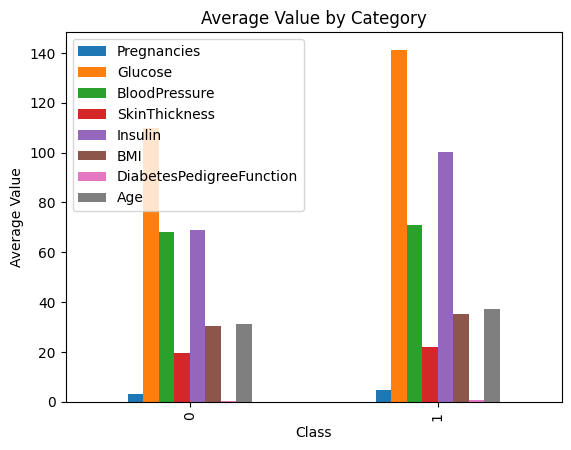

In [ ]:

avg_values = db.groupby('Class').mean()
avg_values.plot(kind='bar')

plt.ylabel("Average Value")
plt.title("Average Value by Category")
plt.show()

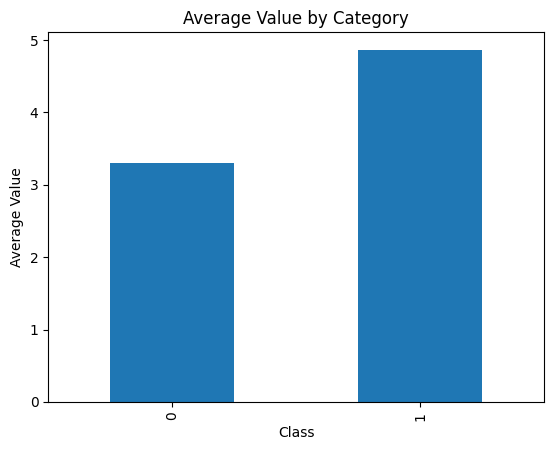

In [ ]:

avg_values = db.groupby('Class')['Pregnancies'].mean()

# Plot bar chart
avg_values.plot(kind='bar')

plt.ylabel("Average Value")
plt.title("Average Value by Category")
plt.show()

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Class'}>]], dtype=object)

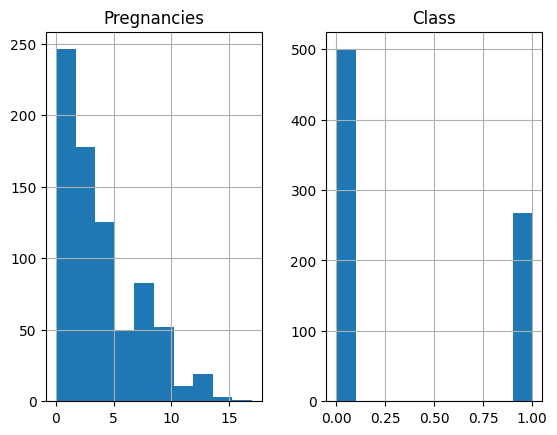

In [ ]:
db2=db[['Pregnancies','Class']]
db2.hist()

#Análise de qualidade de dados

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Filtro
## Apenas pessoas com mais de 30 anos

In [ ]:
dbidade=db[db['Age'] > 30]

In [ ]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dbidade.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,6.028490,128.877493,73.598291,19.039886,74.444444,32.789174,0.501635,43.507123,0.507123
std,3.499271,33.784093,18.379675,17.257664,121.704239,6.727232,0.349930,9.956151,0.500663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,31.000000,0.000000
25%,4.000000,105.000000,68.000000,0.000000,0.000000,28.450000,0.249000,36.000000,0.000000
50%,6.000000,126.000000,76.000000,22.000000,0.000000,32.800000,0.388000,41.000000,1.000000
75%,8.000000,152.500000,82.000000,32.500000,130.000000,36.650000,0.687000,50.000000,1.000000
max,17.000000,197.000000,114.000000,99.000000,846.000000,52.300000,2.329000,81.000000,1.000000


# tutorial básico de spark

In [ ]:
spark = SparkSession.builder.appName("firstspark").getOrCreate()

In [ ]:
# Create a list of data
data = [("Alice", 25), ("Bob", 30), ("Charlie", 28)]

# Create a DataFrame from the data
df = spark.createDataFrame(data, ["name", "age"])

# Print the DataFrame
df.show()

+-------+---+
|   name|age|
+-------+---+
|  Alice| 25|
|    Bob| 30|
|Charlie| 28|
+-------+---+



In [ ]:

df = spark.createDataFrame([
    Row(a=1, b=2., c='string1', d=date(2000, 1, 1), e=datetime(2000, 1, 1, 12, 0)),
    Row(a=2, b=3., c='string2', d=date(2000, 2, 1), e=datetime(2000, 1, 2, 12, 0)),
    Row(a=4, b=5., c='string3', d=date(2000, 3, 1), e=datetime(2000, 1, 3, 12, 0))
])
df

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

In [ ]:
df = spark.createDataFrame([
    (1, 2., 'string1', date(2000, 1, 1), datetime(2000, 1, 1, 12, 0)),
    (2, 3., 'string2', date(2000, 2, 1), datetime(2000, 1, 2, 12, 0)),
    (3, 4., 'string3', date(2000, 3, 1), datetime(2000, 1, 3, 12, 0))
], schema='a long, b double, c string, d date, e timestamp')
df

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

In [ ]:
pandas_df = pd.DataFrame({
    'a': [1, 2, 3],
    'b': [2., 3., 4.],
    'c': ['string1', 'string2', 'string3'],
    'd': [date(2000, 1, 1), date(2000, 2, 1), date(2000, 3, 1)],
    'e': [datetime(2000, 1, 1, 12, 0), datetime(2000, 1, 2, 12, 0), datetime(2000, 1, 3, 12, 0)]
})
df = spark.createDataFrame(pandas_df)
df

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

In [ ]:
df.show()
df.printSchema()

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
|  2|3.0|string2|2000-02-01|2000-01-02 12:00:00|
|  3|4.0|string3|2000-03-01|2000-01-03 12:00:00|
+---+---+-------+----------+-------------------+

root
 |-- a: long (nullable = true)
 |-- b: double (nullable = true)
 |-- c: string (nullable = true)
 |-- d: date (nullable = true)
 |-- e: timestamp (nullable = true)



In [ ]:
df.show(1)

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
+---+---+-------+----------+-------------------+
only showing top 1 row



In [ ]:
df.select("a", "b", "c").describe().show()

+-------+---+---+-------+
|summary|  a|  b|      c|
+-------+---+---+-------+
|  count|  3|  3|      3|
|   mean|2.0|3.0|   NULL|
| stddev|1.0|1.0|   NULL|
|    min|  1|2.0|string1|
|    max|  3|4.0|string3|
+-------+---+---+-------+



## Lendo csv em spark

In [ ]:
dsp = spark.read.csv('pima-indians-diabetes.csv', header=True)
dsp.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-----+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Class|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-----+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|    1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|    0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|    1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|    0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|    1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|    0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|    1|
|         10|    115

## salvando dados como parquet
#### modelo de compactação e acesso otimizado

In [ ]:
dsp.write.parquet('bar3.parquet')


In [ ]:
dspp = spark.read.parquet('bar3.parquet')
dspp.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-----+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Class|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-----+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|    1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|    0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|    1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|    0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|    1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|    0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|    1|
|         10|    115

In [ ]:
!ls -lh

total 11M
drwxr-xr-x 2 root root 4.0K Oct  6 01:48 bar3.parquet
-rw-r--r-- 1 root root  11M Sep 19 17:22 covid_data.csv.zip
-rw-r--r-- 1 root root  23K Oct  6 01:38 pima-indians-diabetes.csv
-rw-r--r-- 1 root root  23K Oct  6 01:39 pima-indians-diabetes.csv.1
-rw-r--r-- 1 root root  23K Oct  6 01:39 pima-indians-diabetes.csv.2
drwxr-xr-x 1 root root 4.0K Oct  2 13:36 sample_data


filtro em spark

In [ ]:
dspp.filter(dspp.Age >= 50).show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-----+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Class|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-----+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|    1|
|          2|    197|           70|           45|    543|30.5|                   0.158| 53|    1|
|          8|    125|           96|            0|      0| 0.0|                   0.232| 54|    1|
|         10|    139|           80|            0|      0|27.1|                   1.441| 57|    0|
|          1|    189|           60|           23|    846|30.1|                   0.398| 59|    1|
|          5|    166|           72|           19|    175|25.8|                   0.587| 51|    1|
|          8|     99|           84|            0|      0|35.4|                   0.388| 50|    0|
|         11|    143

usando SQL para fazer filtro em spark

In [ ]:
dspp.createOrReplaceTempView("tableA")
spark.sql("SELECT age from tableA").show()

+---+
|age|
+---+
| 50|
| 31|
| 32|
| 21|
| 33|
| 30|
| 26|
| 29|
| 53|
| 54|
| 30|
| 34|
| 57|
| 59|
| 51|
| 32|
| 31|
| 31|
| 33|
| 32|
+---+
only showing top 20 rows



In [ ]:
spark.sql("SELECT * from tableA where AGE >= 51 and SkinThickness>20 and Insulin>300").show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-----+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Class|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-----+
|          2|    197|           70|           45|    543|30.5|                   0.158| 53|    1|
|          1|    189|           60|           23|    846|30.1|                   0.398| 59|    1|
|          8|    181|           68|           36|    495|30.1|                   0.615| 60|    1|
|         12|    140|           82|           43|    325|39.2|                   0.528| 58|    1|
|          8|    124|           76|           24|    600|28.7|                   0.687| 52|    1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-----+



## Manipulando dados dataset covid usando spark e pandas (Comparação)

In [ ]:
!unzip covid_data.csv.zip

Archive:  covid_data.csv.zip
  inflating: covid_data.csv          


In [ ]:
!pwd


/content


In [ ]:
!ls -lh /content/*.csv


-rw-r--r-- 1 root root 99M Oct  1  2024 /content/covid_data.csv
-rw-r--r-- 1 root root 23K Oct  6 01:38 /content/pima-indians-diabetes.csv


In [ ]:
db2 = pd.read_csv('covid_data.csv')

In [ ]:
covid_data = spark.read.csv('covid_data.csv', header=True)
covid_data.write.parquet('covid2.parquet')

In [ ]:
!ls -lh /content/covid2.parquet

total 14M
-rw-r--r-- 1 root root 7.6M Oct  6 01:54 part-00000-dfa74bfb-75e2-4b76-a132-907128811fc9-c000.snappy.parquet
-rw-r--r-- 1 root root 6.5M Oct  6 01:54 part-00001-dfa74bfb-75e2-4b76-a132-907128811fc9-c000.snappy.parquet
-rw-r--r-- 1 root root    0 Oct  6 01:54 _SUCCESS


In [ ]:
#atapq = spark.read.parquet('p.parquet')
#atapq.show()

In [ ]:
covid_datapq = spark.read.parquet('covid2.parquet')
cvvpq=covid_datapq.filter(covid_datapq.total_deaths > 102).show()

+--------+---------+-----------+----------+-----------+---------+------------------+------------+----------+-------------------+-----------------------+---------------------+------------------------------+------------------------+----------------------+-------------------------------+-----------------+------------+------------------------+-------------+-------------------------+---------------------+---------------------------------+----------------------+----------------------------------+-----------+---------+------------------------+----------------------+------------------+-------------------------------+-------------+--------------+-----------+------------------+-----------------+-----------------------+--------------+----------------+-------------------------+------------------------------+-----------------------------+-----------------------------------+--------------------------+-------------------------------------+------------------------------+-------------------------------

In [ ]:
covid_datapq = spark.read.parquet('covid2.parquet')
cvvpq=covid_datapq.filter(covid_datapq.new_cases > 102).show()

+--------+---------+-----------+----------+-----------+---------+------------------+------------+----------+-------------------+-----------------------+---------------------+------------------------------+------------------------+----------------------+-------------------------------+-----------------+------------+------------------------+-------------+-------------------------+---------------------+---------------------------------+----------------------+----------------------------------+-----------+---------+------------------------+----------------------+------------------+-------------------------------+-------------+--------------+-----------+------------------+-----------------+-----------------------+--------------+----------------+-------------------------+------------------------------+-----------------------------+-----------------------------------+--------------------------+-------------------------------------+------------------------------+-------------------------------

In [ ]:
cvvpq=covid_datapq.filter(covid_datapq.new_cases > 102)
cvvpq.show()
cvvpq.write.parquet('resultadobusca4.parquet')


+--------+---------+-----------+----------+-----------+---------+------------------+------------+----------+-------------------+-----------------------+---------------------+------------------------------+------------------------+----------------------+-------------------------------+-----------------+------------+------------------------+-------------+-------------------------+---------------------+---------------------------------+----------------------+----------------------------------+-----------+---------+------------------------+----------------------+------------------+-------------------------------+-------------+--------------+-----------+------------------+-----------------+-----------------------+--------------+----------------+-------------------------+------------------------------+-----------------------------+-----------------------------------+--------------------------+-------------------------------------+------------------------------+-------------------------------

In [ ]:
cvvpqread = spark.read.parquet('resultadobusca4.parquet')

In [ ]:
cvv=covid_data.filter(covid_data.total_deaths > 10).show()
cvv.show()

+--------+---------+-----------+----------+-----------+---------+------------------+------------+----------+-------------------+-----------------------+---------------------+------------------------------+------------------------+----------------------+-------------------------------+-----------------+------------+------------------------+-------------+-------------------------+---------------------+---------------------------------+----------------------+----------------------------------+-----------+---------+------------------------+----------------------+------------------+-------------------------------+-------------+--------------+-----------+------------------+-----------------+-----------------------+--------------+----------------+-------------------------+------------------------------+-----------------------------+-----------------------------------+--------------------------+-------------------------------------+------------------------------+-------------------------------

AttributeError: 'NoneType' object has no attribute 'show'

In [ ]:
coviddatapandas = pd.read_csv('covid_data.csv')
coviddatapandas.info()

In [ ]:
cvv2=coviddatapandas2=coviddatapandas[coviddatapandas['total_deaths'] > 102]
cvv2.info()

## Aplicando função distinct usando spark dataset covid

In [ ]:
from datetime import datetime
beginn = datetime.now()
# SPARK
dd=covid_data.select("population").distinct().show()
print(dd)
dd=covid_data.select("median_age").distinct().show()
print(dd)
dd=covid_data.select("total_boosters_per_hundred").distinct().show()
print(dd)
endd = datetime.now()
print(beginn)
print(endd)



In [ ]:

from datetime import datetime
beginn = datetime.now()
# SPARK
dd=covid_datapq.select("population").distinct().show()
print(dd)
dd=covid_datapq.select("median_age").distinct().show()
print(dd)
dd=covid_datapq.select("total_boosters_per_hundred").distinct().show()
print(dd)
dd=covid_datapq.select("positive_rate").distinct().show()
print(dd)
endd = datetime.now()
print(beginn)
print(endd)

+----------+
|population|
+----------+
|   2388997|
|  83369840|
|   1120851|
|  11212198|
|   1341298|
|  11655923|
|   2780472|
|   9967304|
|  13859349|
|   2827382|
|    106459|
|    405285|
|   3233530|
|    304568|
|   5180836|
|3432097300|
|    449002|
|   1472237|
|  51874028|
|      3801|
+----------+
only showing top 20 rows

None
+----------+
|median_age|
+----------+
|      29.4|
|      22.4|
|      19.3|
|      32.7|
|      38.0|
|      20.0|
|      16.7|
|      21.5|
|      17.6|
|      20.4|
|      42.3|
|      26.3|
|      34.3|
|      17.5|
|      44.0|
|      16.8|
|      25.0|
|      24.4|
|      47.9|
|      29.3|
+----------+
only showing top 20 rows

None
+--------------------------+
|total_boosters_per_hundred|
+--------------------------+
|                     52.73|
|                      7.16|
|                     43.67|
|                     61.62|
|                      78.9|
|                     79.41|
|                     23.97|
|                     28

## Aplicando função distinct usando Pandas dataset covid

In [ ]:
# PANDAS
from datetime import datetime
beginn = datetime.now()
ee=coviddatapandas["population"].unique()
print(ee)
ee=coviddatapandas["median_age"].unique()
print(ee)
ee=coviddatapandas["total_boosters_per_hundred"].unique()
print(ee)

endd = datetime.now()
print(beginn)
print(endd)

Faça um filtro usando pyspark na base covid selecionando todas as linhas cujo
campo positive_rate seja menor que 0.2 salve o resultado do filtro como um parquet


In [ ]:
from logging import Filterer
#abrir csv
covid_data = spark.read.csv('covid_data.csv', header=True)

#realizar filtro
Filteredcovid = covid_data.filter(covid_data['positive_rate'] < 0.2)

#salvar o parquet
Filteredcovid.write.parquet('filteredcovid2.parquet', mode='overwrite')

In [ ]:
!beeline -u 'jdbc:hive2://172.203.217.21:10000/' -e "use andressa;create table diabete_andressa(pregnancies int,class int) PARTITIONED BY(age int);"

Connecting to jdbc:hive2://172.203.217.21:10000/
Could not open connection to the HS2 server. Please check the server URI and if the URI is correct, then ask the administrator to check the server status.
Error: Could not open client transport with JDBC Uri: jdbc:hive2://172.203.217.21:10000/: java.net.ConnectException: Connection refused (Connection refused) (state=08S01,code=0)
Cannot run commands specified using -e. No current connection


In [ ]:
!pip install cqlsh

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 41.0 MB/s eta 0:00:00
  Created wheel for pure-sasl: filename=pure_sasl-0.6.2-py3-none-any.whl size=11423 sha256=bd3b2a39cad8e936de48a491929f18b267d54f69924157de830dcea4c08a977b
  Stored in directory: /root/.cache/pip/wheels/5d/bf/32/7369b8b034de66e1c91d3ac3dafbff77ae3c97b9c5c97ea1b2
Successfully built pure-sasl


In [ ]:
!cqlsh 172.203.217.21 -e "DESCRIBE KEYSPACES;"


adrianorabello  joao_siqueira    rafaelyokoyama      system_schema        
brunoroger      lariramos        ricardo             system_traces        
cqlintro        lucasv           rodrigo             system_views         
cqlintro2       luis             system              system_virtual_schema
cqlintro3       marcelo_pacheco  system_auth         thayson              
cqlrodrigo      mauryviana       system_distributed



In [ ]:
!cqlsh 172.203.217.21 -e "CREATE KEYSPACE LariRamos WITH REPLICATION = {'class':'SimpleStrategy', 'replication_factor':1};"

In [ ]:
!cqlsh 172.203.217.21 -e "USE lariramos; CREATE TABLE company (   company_id INT,   name VARCHAR,   PRIMARY KEY (company_id) );"

In [ ]:
!cqlsh 172.203.217.21 -e "USE lariramos; INSERT INTO company (company_id, name) VALUES (1, 'ShoreTel');"

In [ ]:
!cqlsh 172.203.217.21 -e "USE lariramos; INSERT INTO company (company_id, name) VALUES (1, 'Erik''s Company');"

In [ ]:
!cqlsh 172.203.217.21 -e "USE lariramos; INSERT INTO company (company_id, name) VALUES (2, 'Erik''s Company');"

In [ ]:
!cqlsh 172.203.217.21 -e "USE lariramos; INSERT INTO company (company_id, name) VALUES (1, 'ShoreTel');"

In [ ]:
!cqlsh 172.203.217.21 -e "SELECT * FROM lariramos.company;"


 company_id | name
------------+----------------
          1 |   larissaramos
          2 | Erik's Company

(2 rows)


In [ ]:
!cqlsh 172.203.217.21 -e "USE lariramos; INSERT INTO company (company_id, name) VALUES (1, 'larissaramos');"

In [ ]:
!cqlsh 172.203.217.21 -e "USE lariramos;CREATE TABLE employee ( company_id INT,  employee_id INT,   first_name VARCHAR,   last_name VARCHAR,   PRIMARY KEY ((company_id), employee_id));"

In [ ]:
!cqlsh 172.203.217.21 -e "USE lariramos; INSERT INTO employee (company_id, employee_id, first_name, last_name) VALUES (1, 1, 'John', 'Doe');"

In [ ]:
!cqlsh 172.203.217.21 -e "USE lariramos; INSERT INTO employee (company_id, employee_id, first_name, last_name) VALUES (1, 2, 'Jane', 'Doe');"

In [ ]:
!cqlsh 172.203.217.21 -e "USE lariramos; INSERT INTO employee (company_id, employee_id, first_name, last_name) VALUES (2, 3, 'Erik', 'Davidson');"

In [ ]:
!cqlsh 172.203.217.21 -e "USE lariramos; INSERT INTO employee (company_id, employee_id, first_name, last_name) VALUES (1, 1, 'John', 'silvio');"

In [ ]:
!cqlsh 172.203.217.21 -e "USE lariramos; SELECT * FROM employee WHERE company_id=2;"


 company_id | employee_id | first_name | last_name
------------+-------------+------------+-----------
          2 |           3 |       Erik |  Davidson

(1 rows)


In [ ]:
!cqlsh 172.203.217.21 -e "USE lariramos; SELECT * FROM employee WHERE employee_id = 1;"

<stdin>:1:InvalidRequest: Error from server: code=2200 [Invalid query] message="Cannot execute this query as it might involve data filtering and thus may have unpredictable performance. If you want to execute this query despite the performance unpredictability, use ALLOW FILTERING"


In [ ]:
!pip install pymongo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 20.7 MB/s eta 0:00:00


In [ ]:
from pymongo import MongoClient

In [ ]:
MONGODB_CONNECTION_STRING="mongodb+srv://bot-server-db.global.mongocluster.cosmos.azure.com"
MONGODB_USER="silviostanzani"
MONGODB_PASS="FiapPass@12"

In [ ]:
client = MongoClient(
    MONGODB_CONNECTION_STRING,
    username=MONGODB_USER,
    password=MONGODB_PASS
    )

/tmp/ipython-input-1258137330.py:1: UserWarning: You appear to be connected to a CosmosDB cluster. For more information regarding feature compatibility and support please visit https://www.mongodb.com/supportability/cosmosdb
  client = MongoClient(
/usr/local/lib/python3.12/dist-packages/pymongo/synchronous/mongo_client.py:1758: UserWarning: You appear to be connected to a CosmosDB cluster. For more information regarding feature compatibility and support please visit https://www.mongodb.com/supportability/cosmosdb
  self._resolve_srv()


In [ ]:
clientjson={
    "name":"silvio",
    "idade":"30"
}
db = client['LariDB']
coll = db['clients']
result = coll.insert_one(clientjson)

In [ ]:
clientListjson=[{
    "name":"maria",
    "idade":"60"
},
{
    "name":"jose",
    "idade":"32"
}]
db = client['LariDB']
coll = db['clients']
result = coll.insert_many(clientListjson)

In [ ]:
db = client['LariDB']
collection = db["clients"]
result = collection.delete_many({})

In [ ]:
db = client['LariDB']
res=db['clients'].find({'name': 'jose'  })

for item in res:
  print(item)

In [ ]:
git clone